In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_cols = 1000
n_rows = 1000

columns = np.arange(n_cols)
data = np.random.random((n_rows, n_cols))
df = pd.DataFrame(data, columns=columns)
data_dict = {i: {j: col for j, col in enumerate(row)} for i, row in enumerate(data)}

In [3]:
def sum_1(df):
    s = 0
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            s += df.loc[i, j]
    return s

def sum_2(df):
    s = 0
    for row in df.iterrows():
        for col in df.columns:
            s += row[1][col]
    return s

def sum_3(data_dict):
    s = 0
    for col in range(len(data_dict)):
        for row in range(len(data_dict[col])):
            s += data_dict[row][col]
    return s

def sum_4(data_dict):
    s = 0
    for row_key in data_dict.keys():
        for col_key in data_dict[row_key].keys():
            s += data_dict[row_key][col_key]
    return s

def sum_5(data):
    s = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            s += data[i,j]
    return s

def sum_6(data):
    s = 0
    for row in data:
        for col in row:
            s += col
    return s

In [4]:
t11 = []
t12 = []
t13 = []
t14 = []
t15 = []
t16 = []

all_equal = []

n_tests = 100

for _ in range(n_tests):
    
    t0 = time.time()
    s1 = sum_1(df)
    t11.append(time.time() - t0)
    
    t0 = time.time()
    s2 = sum_2(df)
    t12.append(time.time() - t0)
    
    t0 = time.time()
    s3 = sum_3(data_dict)
    t13.append(time.time() - t0)
    
    t0 = time.time()
    s4 = sum_4(data_dict)
    t14.append(time.time() - t0)
    
    t0 = time.time()
    s5 = sum_5(data)
    t15.append(time.time() - t0)
    
    t0 = time.time()
    s6 = sum_6(data)
    t16.append(time.time() - t0)
    
    all_equal.append(s1==s2==s3==s4==s5==s6)

n1 = int(0.2*n_tests)
n2 = int(0.8*n_tests)

t11 = np.mean(sorted(t11)[n1:n2])
t12 = np.mean(sorted(t12)[n1:n2])
t13 = np.mean(sorted(t13)[n1:n2])
t14 = np.mean(sorted(t14)[n1:n2])
t15 = np.mean(sorted(t15)[n1:n2])
t16 = np.mean(sorted(t16)[n1:n2])

print('All equal:      %s' % all(all_equal))
print('df.loc:         %.3f sec' % t11)
print('df.iterrows:    %.3f sec' % t12)
print('dict direct:    %.3f sec' % t13)
print('dict iter keys: %.3f sec' % t14)
print('numpy direct:   %.3f sec' % t15)
print('numpy for in:   %.3f sec' % t16)

All equal:      False
df.loc:         8.416 sec
df.iterrows:    3.596 sec
dict direct:    0.241 sec
dict iter keys: 0.154 sec
numpy direct:   0.218 sec
numpy for in:   0.114 sec


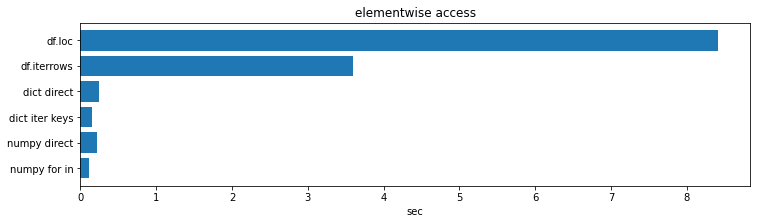

In [5]:
plt.figure(figsize=(12,3))
plt.title('elementwise access')
plt.barh([6,5,4,3,2,1], [t11,t12,t13,t14,t15,t16])
plt.yticks([1,2,3,4,5,6], ['numpy for in', 'numpy direct', 'dict iter keys', 'dict direct', 'df.iterrows', 'df.loc'])
plt.xlabel('sec')
plt.show()

In [6]:
t21 = []
t22 = []

all_equal = []

n_tests = 100

for _ in range(n_tests):
    
    t0 = time.time()
    s1 = df.sum(axis=1)
    t21.append(time.time() - t0)
    
    t0 = time.time()
    s2 = data.sum(axis=1)
    t22.append(time.time() - t0)
    
    all_equal.append(np.array_equal(s1, s2))

n1 = int(0.2*n_tests)
n2 = int(0.8*n_tests)

t21 = np.mean(sorted(t21)[n1:n2])
t22 = np.mean(sorted(t22)[n1:n2])

print('All equal: %s' % all(all_equal))
print('df.sum: %.5f sec' % t21)
print('np.sum: %.5f sec' % t22)

All equal: True
df.sum: 0.00456 sec
np.sum: 0.00048 sec


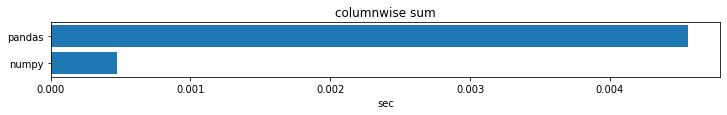

In [7]:
plt.figure(figsize=(12,1))
plt.title('columnwise sum')
plt.barh([2, 1], [t21,t22])
plt.yticks([1, 2], ['numpy', 'pandas'])
plt.xlabel('sec')
plt.show()

In [8]:
t31 = []
t32 = []

error1 = []
error2 = []

n_tests = 100

s0 = sum_3(data)

for _ in range(n_tests):
    
    t0 = time.time()
    s1 = df.sum().sum()
    t31.append(time.time() - t0)
    error1.append(abs(s0 - s1))
    
    t0 = time.time()
    s2 = data.sum()
    t32.append(time.time() - t0)
    error2.append(abs(s0 - s2))
    
n1 = int(0.2*n_tests)
n2 = int(0.8*n_tests)

t31 = np.mean(sorted(t31)[n1:n2])
t32 = np.mean(sorted(t32)[n1:n2])

print('pandas: %.5f sec, max abs err = %.3e' % (t31, max(error1)))
print('numpy:  %.5f sec, max abs err = %.3e' % (t32, max(error2)))

pandas: 0.00454 sec, max abs err = 1.199e-08
numpy:  0.00044 sec, max abs err = 1.193e-08


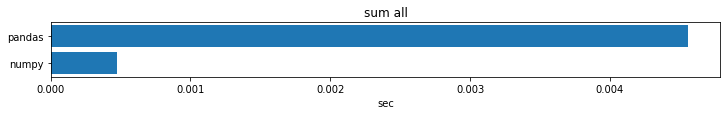

In [9]:
plt.figure(figsize=(12,1))
plt.title('sum all')
plt.barh([2, 1], [t21,t22])
plt.yticks([1, 2], ['numpy', 'pandas'])
plt.xlabel('sec')
plt.show()